In [ ]:
!pip install umap-learn
!pip install hdbscan
!pip install bertopic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
rawdata = pd.read_csv('/content/drive/My Drive/visual results/RepeatExperimentData/train_filter.csv')
rawdata

,Order,text,final_topic,topics,label
0,610,I was just wondering if you guys could just pu...,Accessibility options_2,Accessibility options,1
1,782,But I can't play it anymore: the full-screen w...,Accessibility options_1,Accessibility options,1
2,34,"Otherwise liked a lot of the premise, would c...",Accessibility options_2,Accessibility options,1
3,1122,I guess you guys don not care about deaf or ha...,Accessibility options_1,Accessibility options,1
4,81,the colour schemes for stars and economies ar...,Accessibility options_1,Accessibility options,1
...,...,...,...,...,...
2164,577,"Graphics are super nice, and",VisualAtmosphere_5,VisualAtmosphere,61
2165,323,you’ll find yourself in camera mode every 5min...,VisualAtmosphere_5,VisualAtmosphere,61
2166,697,"had my reservations, but it is actually pretty...",VisualAtmosphere_5,VisualAtmosphere,61
2167,36,"Graphics are good, some screen tearing, but th...",VisualAtmosphere_4,VisualAtmosphere,61


In [ ]:
docs=rawdata['text']
y = rawdata["label"]
y_names = rawdata["topics"]

In [ ]:
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "content":rawdata['text'],
                          "labels":rawdata["topics"],
                          "Topic": topics})


documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

In [ ]:
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: rawdata["label"][key] for key, value in mappings.items()}

In [ ]:
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,217,0_ai_friends_multiplayer_npcs,"[ai, friends, multiplayer, npcs, player, join,...","[They will shrug off hits that you can't, they...",2
1,1,106,1_overall_shooter_best_tactical,"[overall, shooter, best, tactical, shows, offe...",[you can tell that this is not an English game...,2
2,2,103,2_bugs_crashes_save_performance,"[bugs, crashes, save, performance, fix, bug, l...",[I got sick of multiplayer bugs so I went to m...,1
3,3,87,3_graphics_photo_visuals_visually,"[graphics, photo, visuals, visually, taking, g...",[Most everything you can land on in NMS is bri...,2
4,4,77,4_difficulty_difficult_easy_challenging,"[difficulty, difficult, easy, challenging, cha...",[Staff being reduced from 4 types to 3 feels l...,2
5,5,71,5_theme_hospital_rainbow_subnautica,"[theme, hospital, rainbow, subnautica, point, ...",[I played Rainbow Six Raven Shield and SWAT 4 ...,1
6,6,68,6_progression_unlock_unlocks_unlocked,"[progression, unlock, unlocks, unlocked, achie...","[ done all the modes but it’s a weird feeling,...",2
7,7,66,7_exploration_explore_planets_exploring,"[exploration, explore, planets, exploring, dis...",[In my 6 hours of play as of writing this I ha...,2
8,8,66,8_waiting_absorbed_oh_empty,"[waiting, absorbed, oh, empty, bored, walk, ad...","[each hospital location has unique goals, from...",2
9,9,63,9_update_updates_content_dlc,"[update, updates, content, dlc, new, dlcs, dow...",[the only one I would not recommend is the fan...,2


In [ ]:
Class = ["InteractionSocialisation",
"GameEvaluation",
"BugsCrashing",
"VisualAtmosphere",
"DifficultyBalance",
"Comparison",
"GameProgression",
"Exploration",
"Engaging",
"Update",
"ImmersionRealism",
"Novelty",
"Controls",
"Narrative",
"Developer",
"Audio",
"Platforms",
"Learnability",
"Combat mechanics",
"Management mechanics",
"Recommendation",
"Playtime and Gameplay length",
"Creative mechanics",
"Customisation",
"PersonalInfluence",
"Emotion",
"Development states",
"Guide and Tutorials",
"UIandUX",
"PriceQuality ratio",
"Players modification and Workshops",
"OnlineVideo",
"Movement mechanics",
"Survival mechanics",
"Virtual reality headset",
"In-game economic mechanics",
"Order state",
"Content filter",
"Mode settings",
"Navigation and Maps",
"Graphics settings",
"Review reception",
"Server",
"Promotion strategy and Marketing collateral",
"In-game physics mechanics",
"Social identity",
"Returning player",
"Accessibility options",
"Camera control",
"Puzzle mechanics",
"Refund",
"Game awareness duration",
"Language settings and Localisation"
]

In [ ]:
# value_counts = rawdata['topics'].value_counts()
# value_counts.to_csv('/content/value_counts.csv',header=True)


In [ ]:
# df= pd.read_csv('/content/train-BERTopi53.csv')
df["Class"] = Class
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,217,0_ai_friends_multiplayer_npcs,"[ai, friends, multiplayer, npcs, player, join,...","[They will shrug off hits that you can't, they...",InteractionSocialisation
1,1,106,1_overall_shooter_best_tactical,"[overall, shooter, best, tactical, shows, offe...",[you can tell that this is not an English game...,GameEvaluation
2,2,103,2_bugs_crashes_save_performance,"[bugs, crashes, save, performance, fix, bug, l...",[I got sick of multiplayer bugs so I went to m...,BugsCrashing
3,3,87,3_graphics_photo_visuals_visually,"[graphics, photo, visuals, visually, taking, g...",[Most everything you can land on in NMS is bri...,VisualAtmosphere
4,4,77,4_difficulty_difficult_easy_challenging,"[difficulty, difficult, easy, challenging, cha...",[Staff being reduced from 4 types to 3 feels l...,DifficultyBalance
5,5,71,5_theme_hospital_rainbow_subnautica,"[theme, hospital, rainbow, subnautica, point, ...",[I played Rainbow Six Raven Shield and SWAT 4 ...,Comparison
6,6,68,6_progression_unlock_unlocks_unlocked,"[progression, unlock, unlocks, unlocked, achie...","[ done all the modes but it’s a weird feeling,...",GameProgression
7,7,66,7_exploration_explore_planets_exploring,"[exploration, explore, planets, exploring, dis...",[In my 6 hours of play as of writing this I ha...,Exploration
8,8,66,8_waiting_absorbed_oh_empty,"[waiting, absorbed, oh, empty, bored, walk, ad...","[each hospital location has unique goals, from...",Engaging
9,9,63,9_update_updates_content_dlc,"[update, updates, content, dlc, new, dlcs, dow...",[the only one I would not recommend is the fan...,Update


In [ ]:
test = pd.read_csv('/content/drive/My Drive/visual results/RepeatExperimentData/test_filter.csv')
test

,Order,text,final_topic,topics,label
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1
...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61


In [ ]:
new_docs=test['text']
topics, probs = topic_model.transform(new_docs)


In [ ]:
documents = pd.DataFrame({"Document": new_docs,
                          "Original_topic":test["topics"],
                          "Topic": topics})

In [ ]:
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

In [ ]:
documents

,Document,Original_topic,Topic
0,it is honestly weird to me that a game from a ...,Accessibility options,14
1,but no option/support/inclusion of subtitles a...,Accessibility options,15
2,"Like most games, this one doesn't have left ha...",Accessibility options,12
3,"in 21st centry, there's yet another game can't...",Accessibility options,12
4,how on earth can a game released in 2018 and s...,Accessibility options,9
...,...,...,...
914,the game is so outstanding and amazing with co...,VisualAtmosphere,1
915,"The diverse and vibrant environments,",VisualAtmosphere,3
916,"With the addition of photo mode stuff,",VisualAtmosphere,3
917,if you do not already know it is a hospital si...,VisualAtmosphere,1


In [ ]:
documents.to_csv('/content/drive/My Drive/visual results/RepeatExperimentData/test_predict.csv')

In [ ]:
Labels={
0:"InteractionSocialisation",
1:"GameEvaluation",
2:"BugsCrashing",
3:"VisualAtmosphere",
4:"DifficultyBalance",
5:"Comparison",
6:"GameProgression",
7:"Exploration",
8:"Engaging",
9:"Update",
10:"ImmersionRealism",
11:"Novelty",
12:"Controls",
13:"Narrative",
14:"Developer",
15:"Audio",
16:"Platforms",
17:"Learnability",
18:"Combat mechanics",
19:"Management mechanics",
20:"Recommendation",
21:"Playtime and Gameplay length",
22:"Creative mechanics",
23:"Customisation",
24:"PersonalInfluence",
25:"Emotion",
26:"Development states",
27:"Guide and Tutorials",
28:"UIandUX",
29:"PriceQuality ratio",
30:"Players modification and Workshops",
31:"OnlineVideo",
32:"Movement mechanics",
33:"Survival mechanics",
34:"Virtual reality headset",
35:"In-game economic mechanics",
36:"Order state",
37:"Content filter",
38:"Mode settings",
39:"Navigation and Maps",
40:"Graphics settings",
41:"Review reception",
42:"Server",
43:"Promotion strategy and Marketing collateral",
44:"In-game physics mechanics",
45:"Social identity",
46:"Returning player",
47:"Accessibility options",
48:"Camera control",
49:"Puzzle mechanics",
50:"Refund",
51:"Game awareness duration",
52:"Language settings and Localisation"
}

In [ ]:
documents['topic_numerber']=documents['Topic']
documents_replace=documents.replace({"Topic": Labels})

In [ ]:
documents_replace

,Document,Original_topic,Topic,topic_numerber
0,it is honestly weird to me that a game from a ...,Accessibility options,Developer,14
1,but no option/support/inclusion of subtitles a...,Accessibility options,Audio,15
2,"Like most games, this one doesn't have left ha...",Accessibility options,Controls,12
3,"in 21st centry, there's yet another game can't...",Accessibility options,Controls,12
4,how on earth can a game released in 2018 and s...,Accessibility options,Update,9
...,...,...,...,...
914,the game is so outstanding and amazing with co...,VisualAtmosphere,GameEvaluation,1
915,"The diverse and vibrant environments,",VisualAtmosphere,VisualAtmosphere,3
916,"With the addition of photo mode stuff,",VisualAtmosphere,VisualAtmosphere,3
917,if you do not already know it is a hospital si...,VisualAtmosphere,GameEvaluation,1


In [ ]:
documents_replace.to_csv('/content/drive/My Drive/visual results/RepeatExperimentData/test_predict_replaced.csv')

In [ ]:
documents_replace[documents_replace['Original_topic'] != documents_replace['Topic']]

,Document,Original_topic,Topic,topic_numerber
0,it is honestly weird to me that a game from a ...,Accessibility options,Developer,14
1,but no option/support/inclusion of subtitles a...,Accessibility options,Audio,15
2,"Like most games, this one doesn't have left ha...",Accessibility options,Controls,12
3,"in 21st centry, there's yet another game can't...",Accessibility options,Controls,12
4,how on earth can a game released in 2018 and s...,Accessibility options,Update,9
...,...,...,...,...
892,"Maps are varied in size and design, different ...",VisualAtmosphere,Navigation and Maps,39
901,"in addition, the rooms can be designed with g...",VisualAtmosphere,Novelty,11
903,"The ambience, mechanics, gameplay, atmosphere ...",VisualAtmosphere,Novelty,11
914,the game is so outstanding and amazing with co...,VisualAtmosphere,GameEvaluation,1


In [ ]:
from sklearn.metrics import confusion_matrix

y_actu = documents_replace['Original_topic']
y_pred = documents_replace['Topic']

In [ ]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,Audio,BugsCrashing,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,Development states,...,Recommendation,Refund,Review reception,Server,Survival mechanics,UIandUX,Update,Virtual reality headset,VisualAtmosphere,All
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,1,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
Audio,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
BugsCrashing,0,34,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,48
Camera control,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Combat mechanics,0,1,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
Comparison,0,0,0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,24
Content filter,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Controls,0,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14
Creative mechanics,0,1,1,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [ ]:
df_confusion =df_confusion[:53]
df_confusion= df_confusion.drop('All', axis=1)
df_confusion

Predicted,Audio,BugsCrashing,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,Development states,...,Puzzle mechanics,Recommendation,Refund,Review reception,Server,Survival mechanics,UIandUX,Update,Virtual reality headset,VisualAtmosphere
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,1,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Audio,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BugsCrashing,0,34,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Camera control,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Combat mechanics,0,1,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comparison,0,0,0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Content filter,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Controls,0,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Creative mechanics,0,1,1,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_true = []
y_pred = []
for actual_class in df_confusion.index:
    for predicted_class in df_confusion.columns:
        count = df_confusion.loc[actual_class, predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score (Macro):", f1)

F1 Score (Macro): 0.44275668522544237


In [ ]:
f1 = f1_score(y_true, y_pred, average='micro')
print("F1 Score (Micro):", f1)

F1 Score (Micro): 0.545157780195865


In [ ]:
df_confusion.to_csv('/content/drive/My Drive/visual results/RepeatExperimentData/test_predict_replaced_confusion.csv')


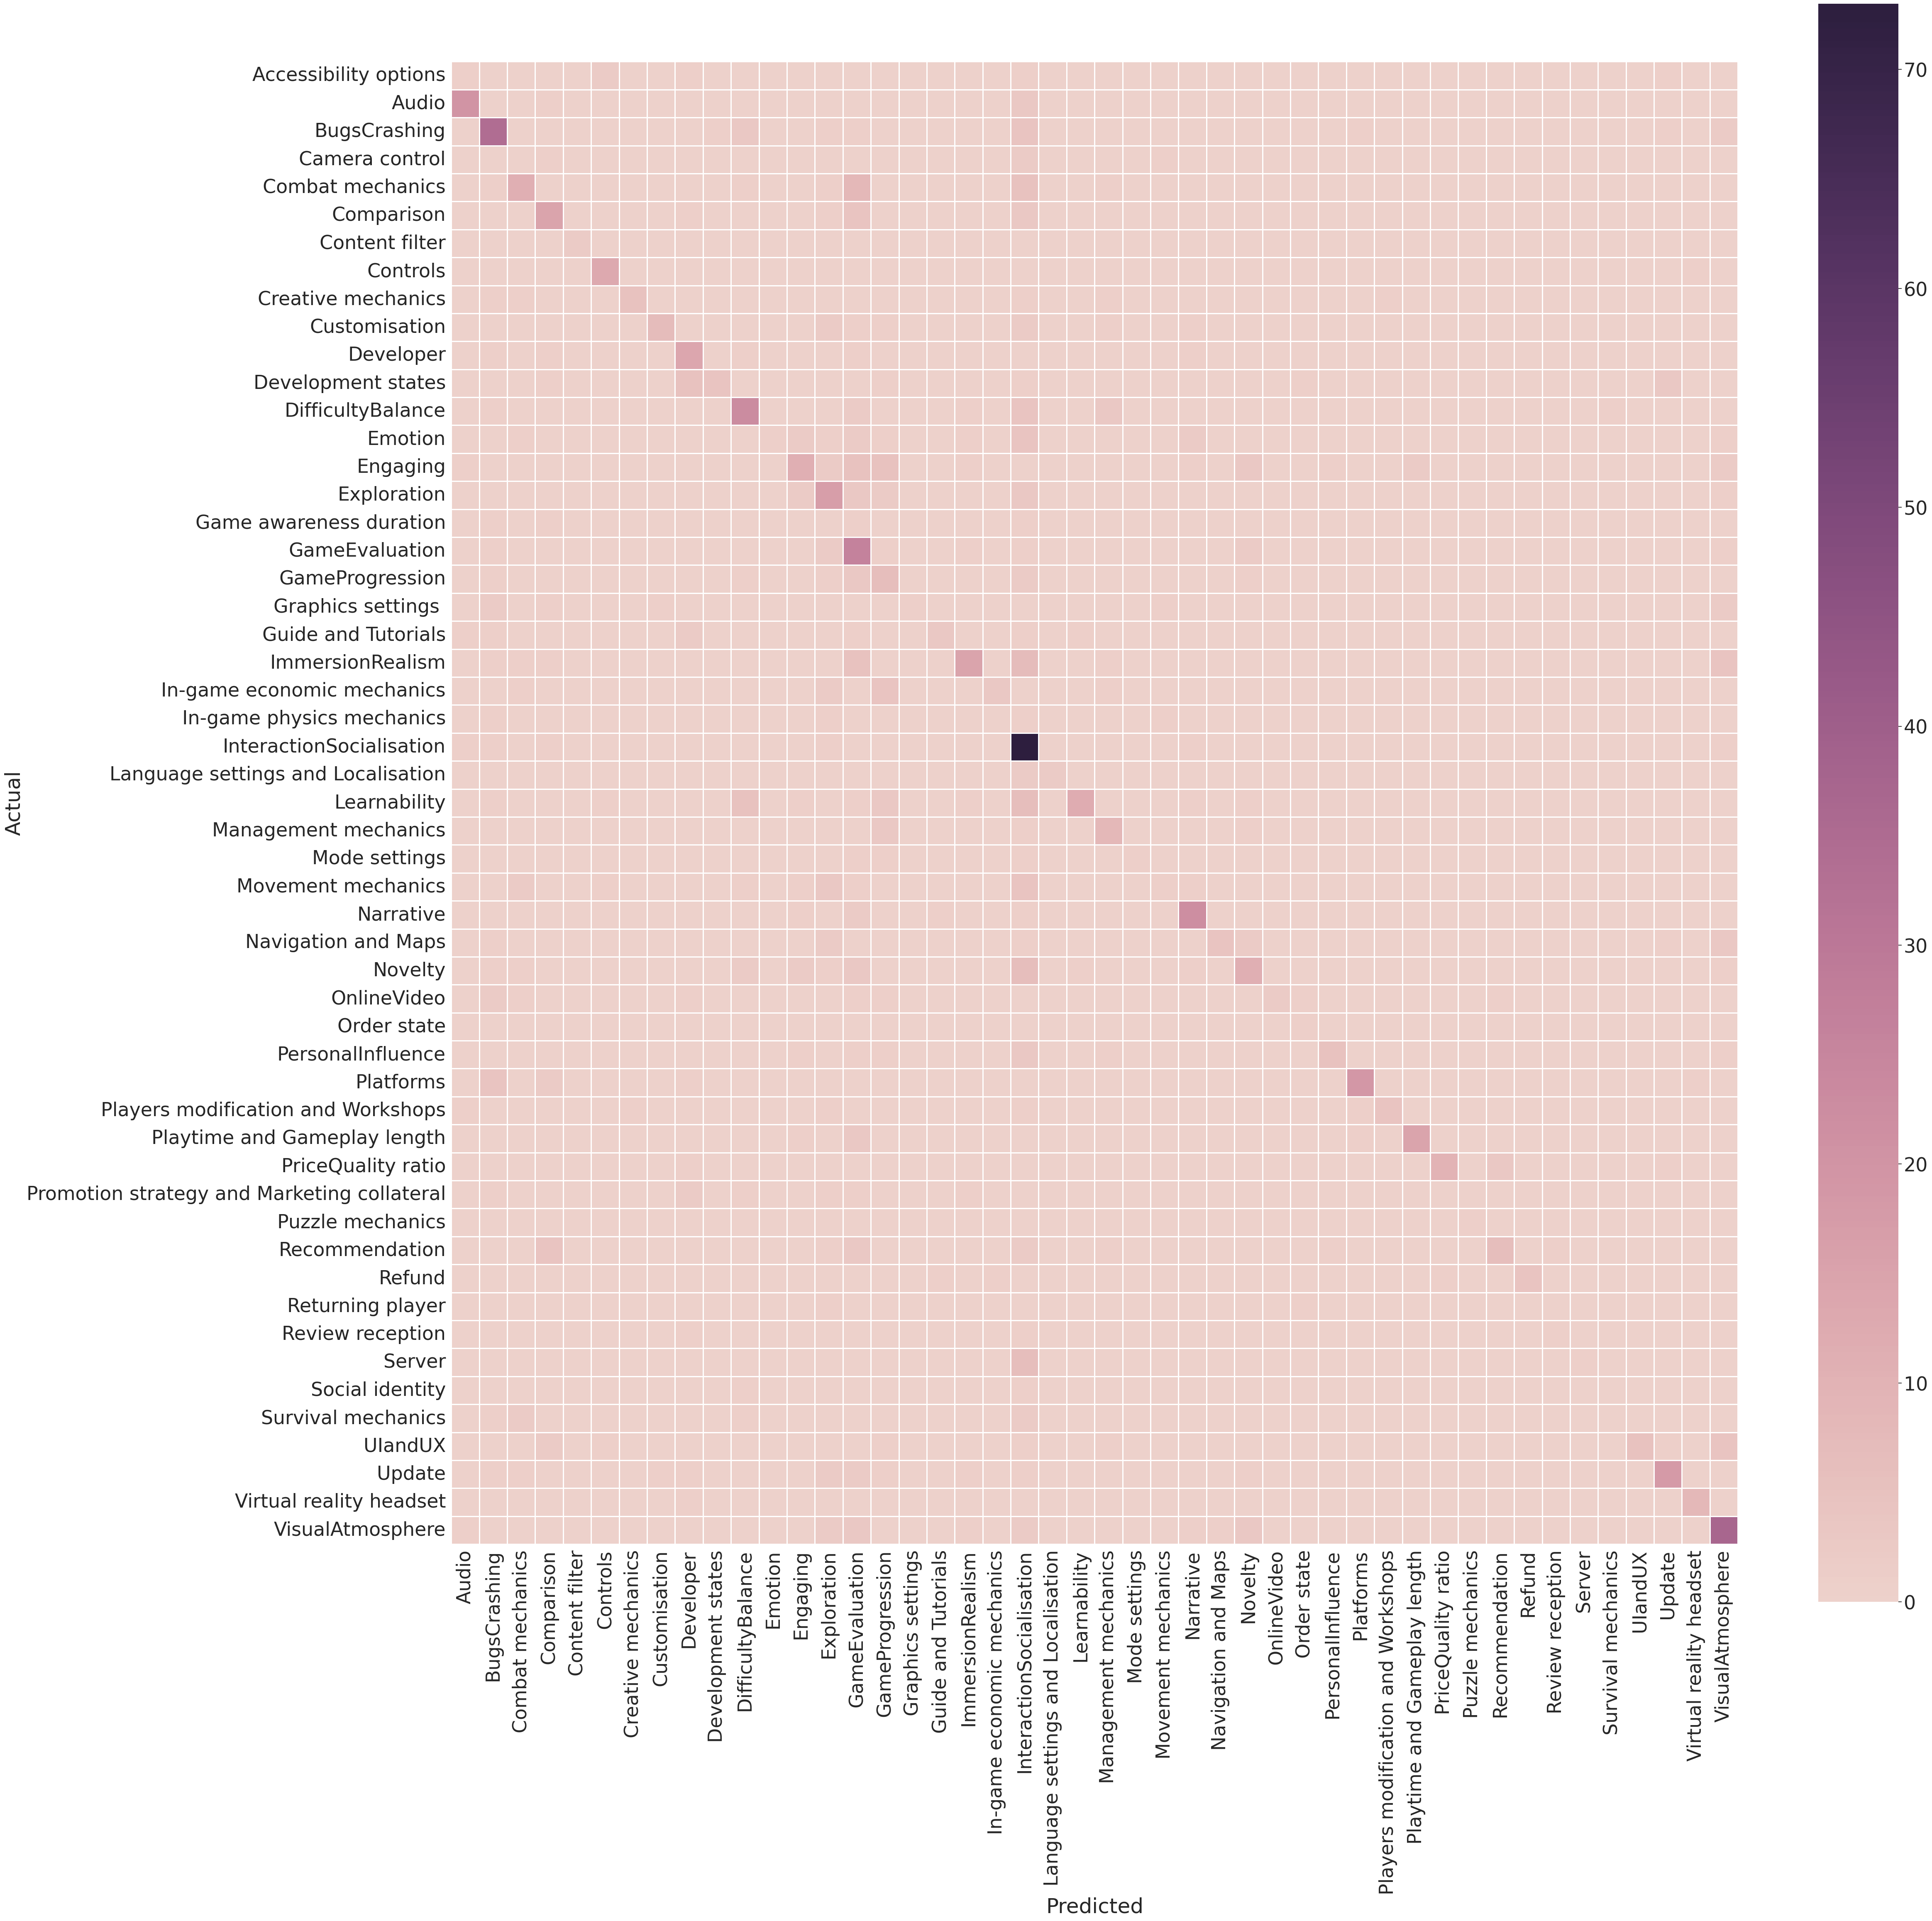

In [ ]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap=sn.cubehelix_palette(as_cmap=True), fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()

In [ ]:
from sklearn.preprocessing import minmax_scale
df_confusion[:] = minmax_scale(df_confusion)

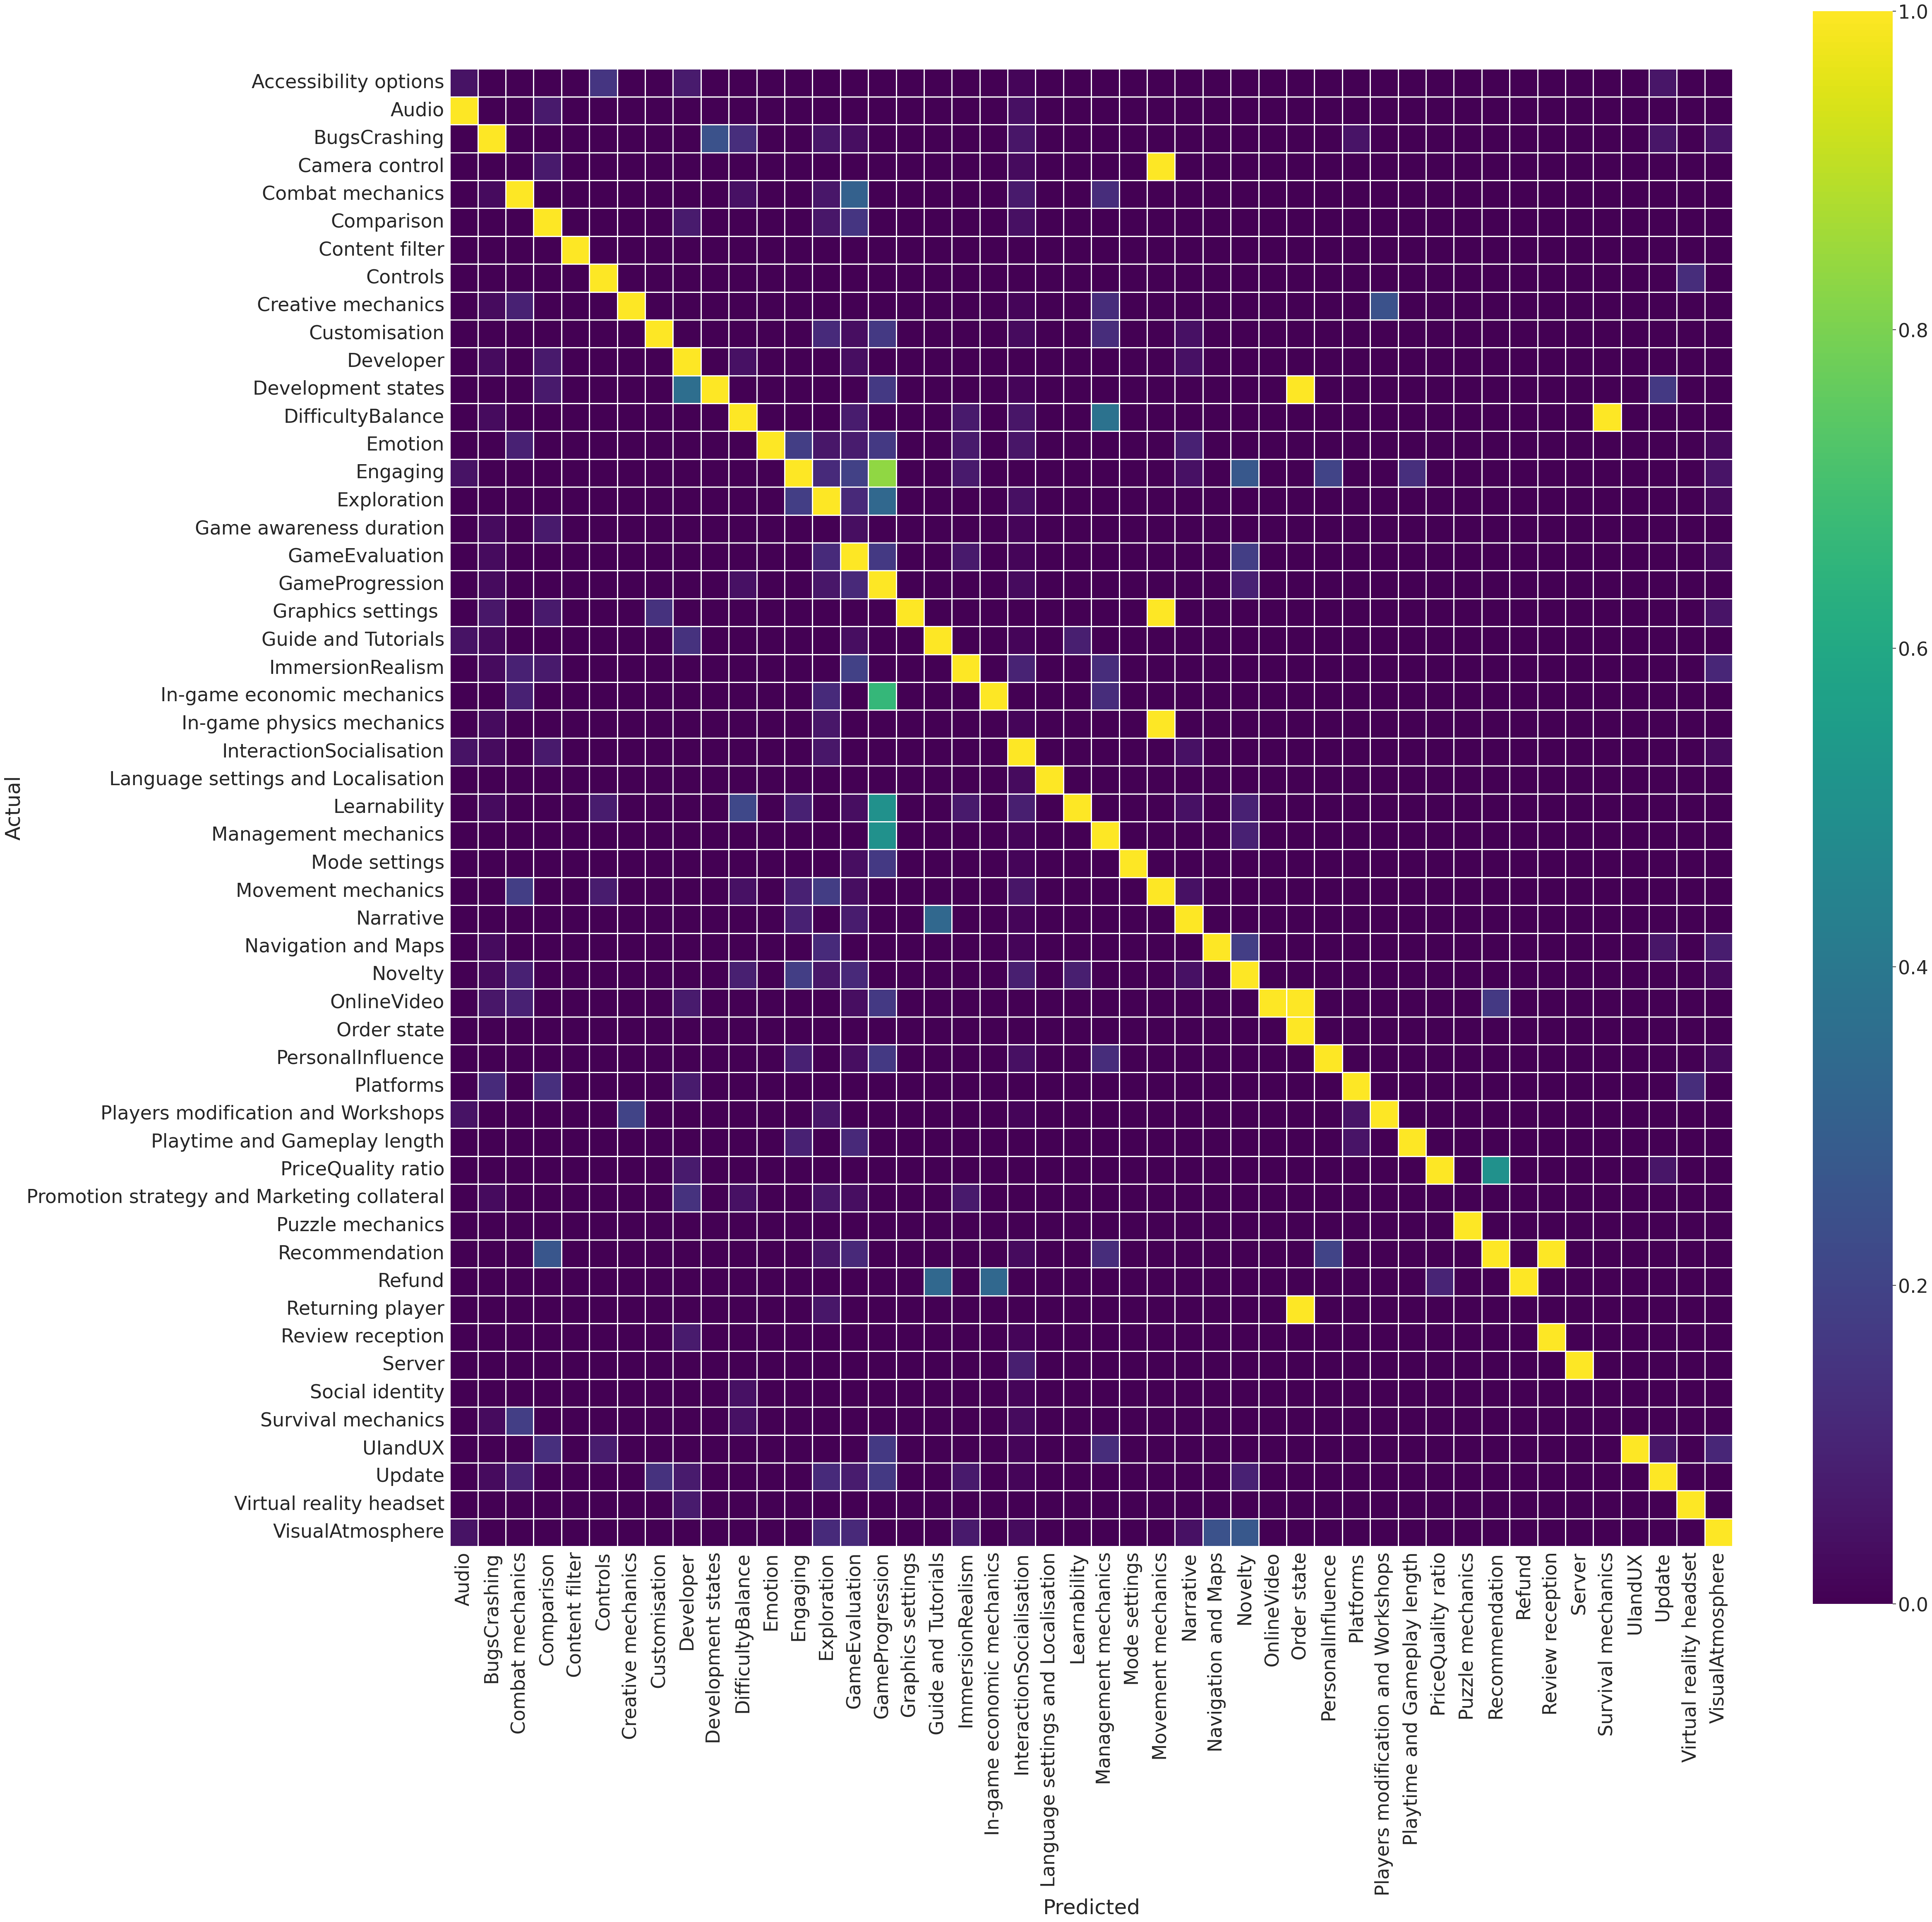

In [ ]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap="viridis", fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()